In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Load datasets and combine them
- Loaded training, test, and submission data.
- Separated target and features for train and test datasets.
- Combined training and test features and targets into one dataset for preprocessing.


In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
submission_data = pd.read_csv('sample_submission.csv')

In [4]:
y_train = train_data['Transported']
x_train = train_data.drop(columns='Transported')

y_test = submission_data['Transported']
x_test = test_data

In [5]:
x_data = pd.concat([x_train, x_test], axis=0, ignore_index=True)
y_data = pd.concat([y_train, y_test], axis=0, ignore_index=True)

train_test_data = pd.concat([x_data, y_data], axis=1)

In [6]:
train_data.shape, test_data.shape, train_test_data.shape, 8693+4277

((8693, 14), (4277, 13), (12970, 14), 12970)

In [7]:
train_test_data.head(3)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False


In [8]:
train_test_data.nunique()

PassengerId     12970
HomePlanet          3
CryoSleep           2
Cabin            9825
Destination         3
Age                80
VIP                 2
RoomService      1578
FoodCourt        1953
ShoppingMall     1367
Spa              1679
VRDeck           1642
Name            12629
Transported         2
dtype: int64

In [9]:
train_test_data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,12700.000000,12707.000000,12681.000000,12664.000000,12686.000000,12702.000000
mean,28.771969,222.897852,451.961675,174.906033,308.476904,306.789482
std,14.387261,647.596664,1584.370747,590.558690,1130.279641,1180.097223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,49.000000,77.000000,29.000000,57.000000,42.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


## Plot transportation counts by categorical features
- Grouped data by the specified feature and 'Transported' to count occurrences.
- Created stacked bar plots for each categorical feature to visualize transportation counts.
- Plotted for features: 'HomePlanet', 'CryoSleep', 'Destination', and 'VIP'.


In [10]:
def plot_transportation_counts(feature):
    
    survival_counts = train_test_data.groupby([feature, 'Transported']).size().unstack(fill_value=0)

    survival_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])

    plt.title(f'Transportation Counts by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.legend(['False', 'True'], title='Transported', loc='upper left')
    plt.show()


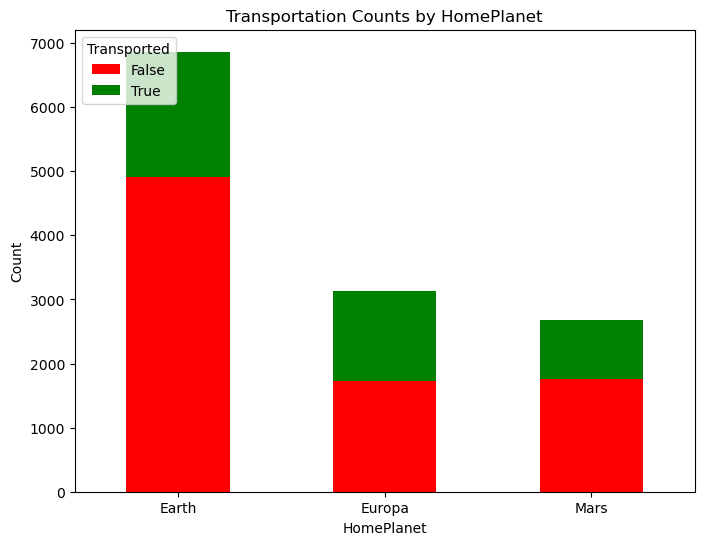

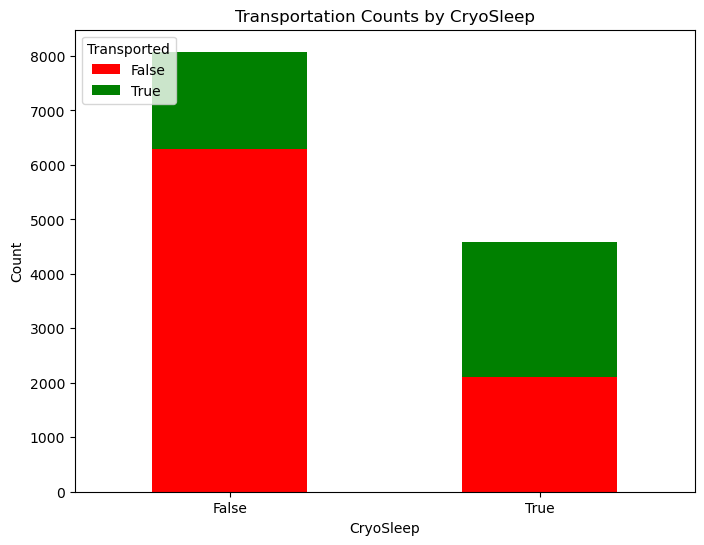

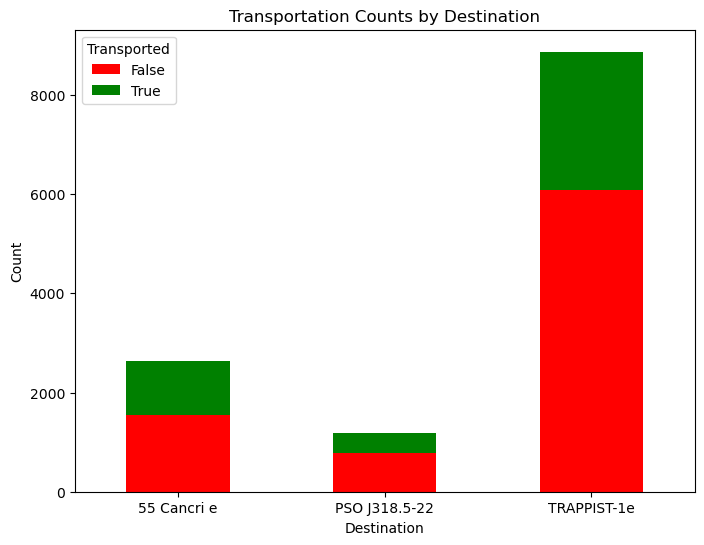

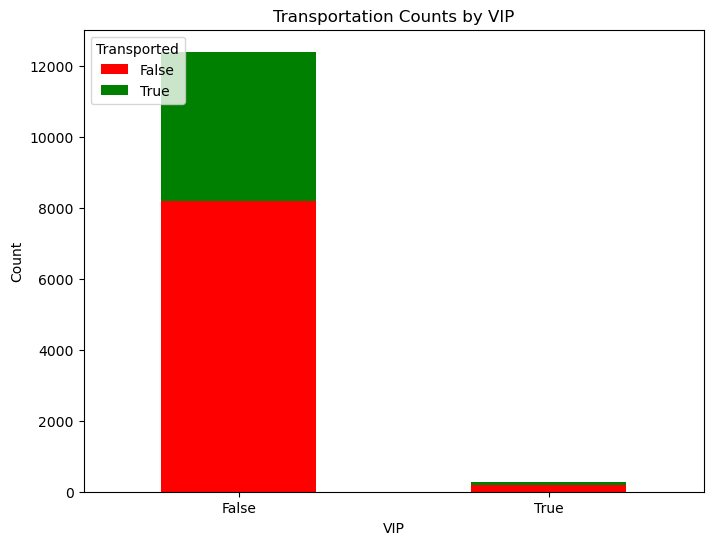

In [11]:
catagorical_features = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']

for featuter in catagorical_features:
    plot_transportation_counts(feature=featuter)

## Compare transportation counts by two features
- Grouped data by two specified features and the target column to count occurrences.
- Created a stacked bar plot to compare transportation counts by the two features.


In [12]:
def compare_transportation_counts(feature1, feature2):
    # Group by the specified features and the target column, then count occurrences
    transportation_counts = train_test_data.groupby([feature1, feature2, 'Transported']).size().unstack(fill_value=0)

    # Plotting
    transportation_counts.plot(kind='bar', stacked=True, figsize=(8, 6), color=['red', 'green'])

    plt.title(f'Transportation Counts by {feature1} and {feature2}')
    plt.xlabel(f'{feature1} and {feature2}')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.legend(['False', 'True'], title='Transported', loc='upper left')
    plt.tight_layout()
    plt.show()


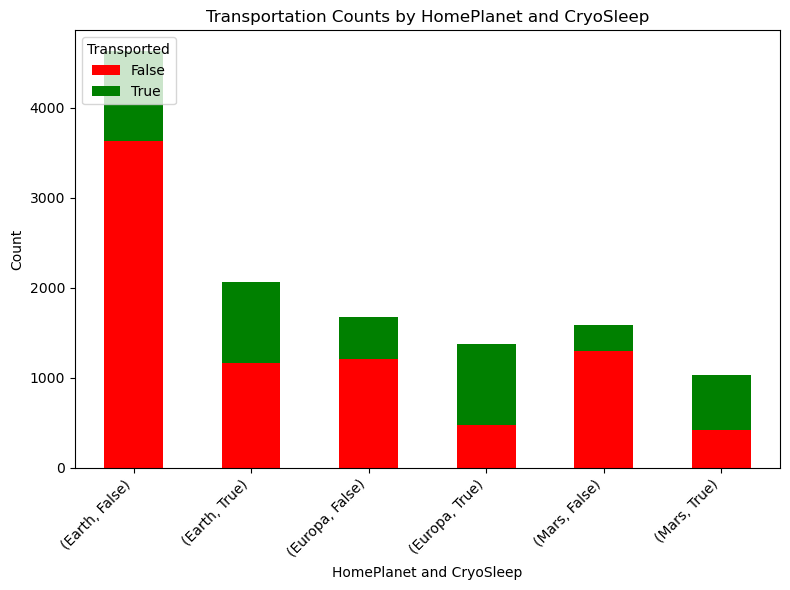

In [13]:
compare_transportation_counts('HomePlanet', 'CryoSleep')

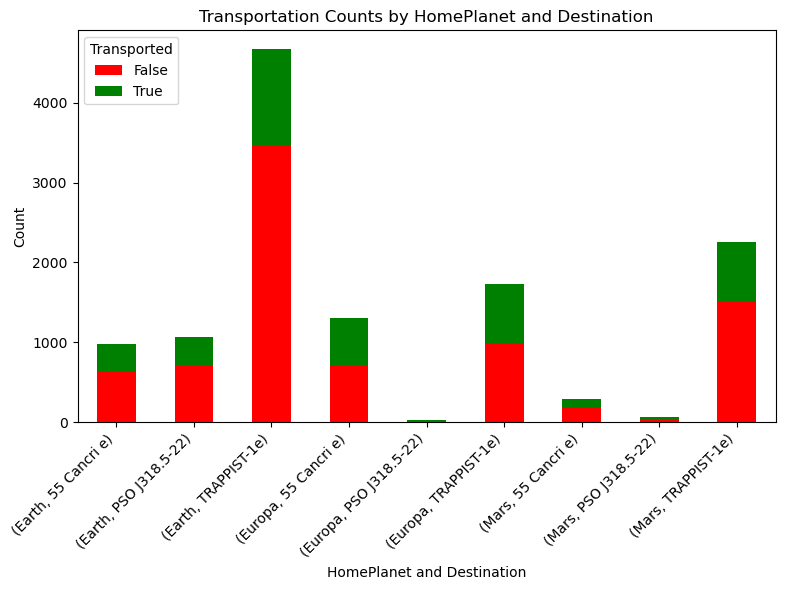

In [14]:
compare_transportation_counts('HomePlanet', 'Destination')

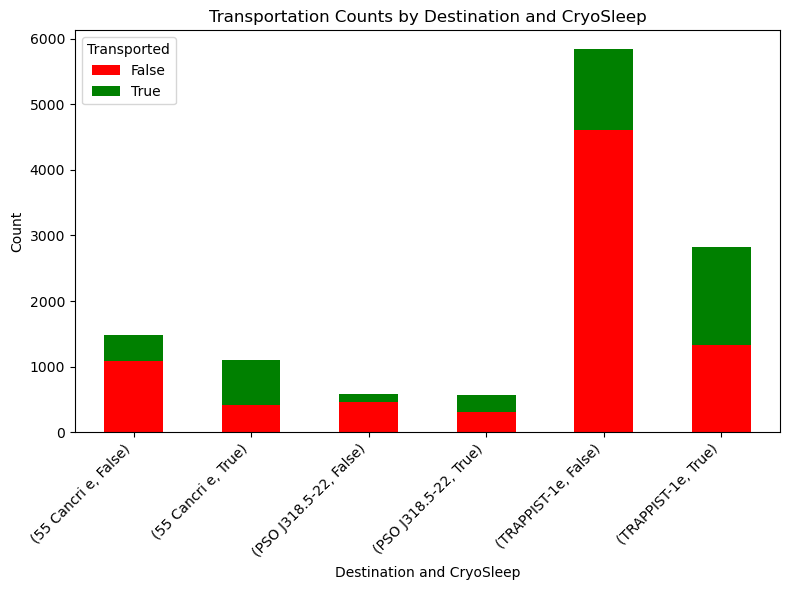

In [15]:
compare_transportation_counts('Destination', 'CryoSleep')

## Plot distribution and boxplot of continuous feature by transportation status
- Plotted a histogram with KDE to show the distribution of the feature by transportation status.
- Created a boxplot to compare the feature's distribution across transportation statuses.


In [16]:
def plot_continuous_feature(feature):
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    # Histogram with Transportation distinction
    sns.histplot(data=train_test_data, x=feature, hue='Transported', kde=True, ax=axes[0], multiple='stack')
    axes[0].set_title(f'Distribution of {feature} by Transportation Status')
    axes[0].set_xlabel(feature)
    axes[0].set_ylabel('Frequency')

    # Boxplot with Transportation distinction
    sns.boxplot(data=train_test_data, x='Transported', y=feature, ax=axes[1])
    axes[1].set_title(f'{feature} Boxplot by Transportation Status')
    axes[1].set_xlabel('Transported')
    axes[1].set_ylabel(feature)

    plt.tight_layout()
    plt.show()


In [17]:
numerical_features = train_test_data.select_dtypes(include=['float64', 'int64']).columns

numerical_features

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

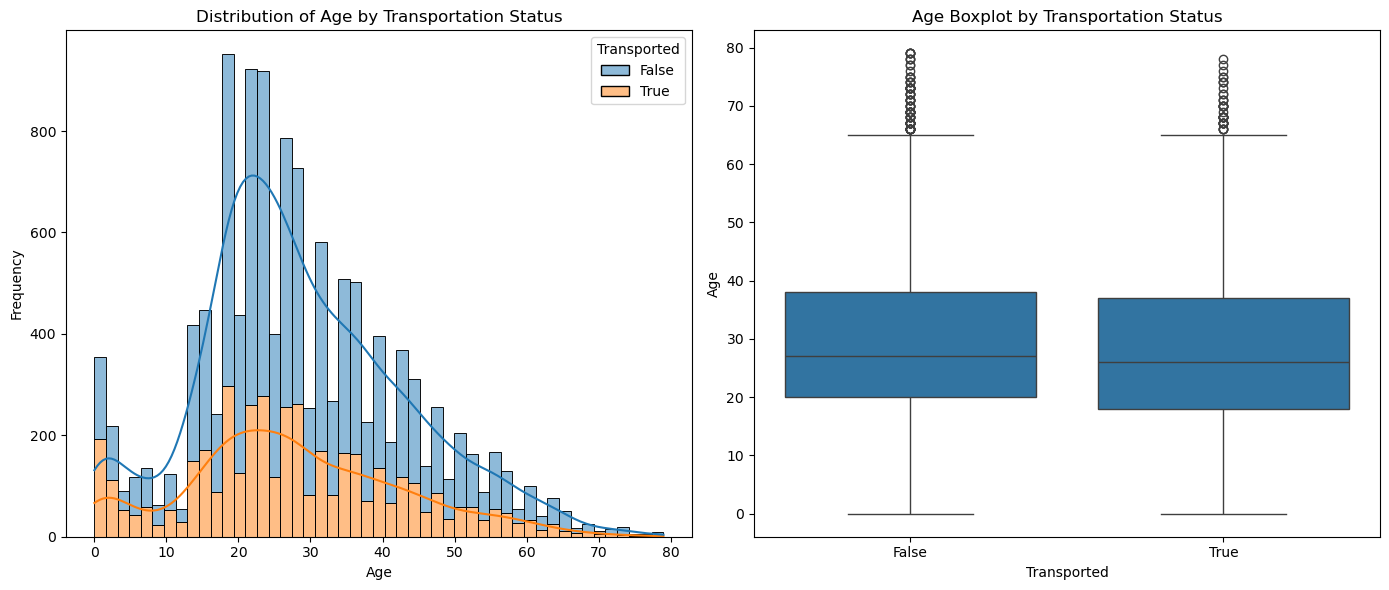

c:\Users\Durjay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


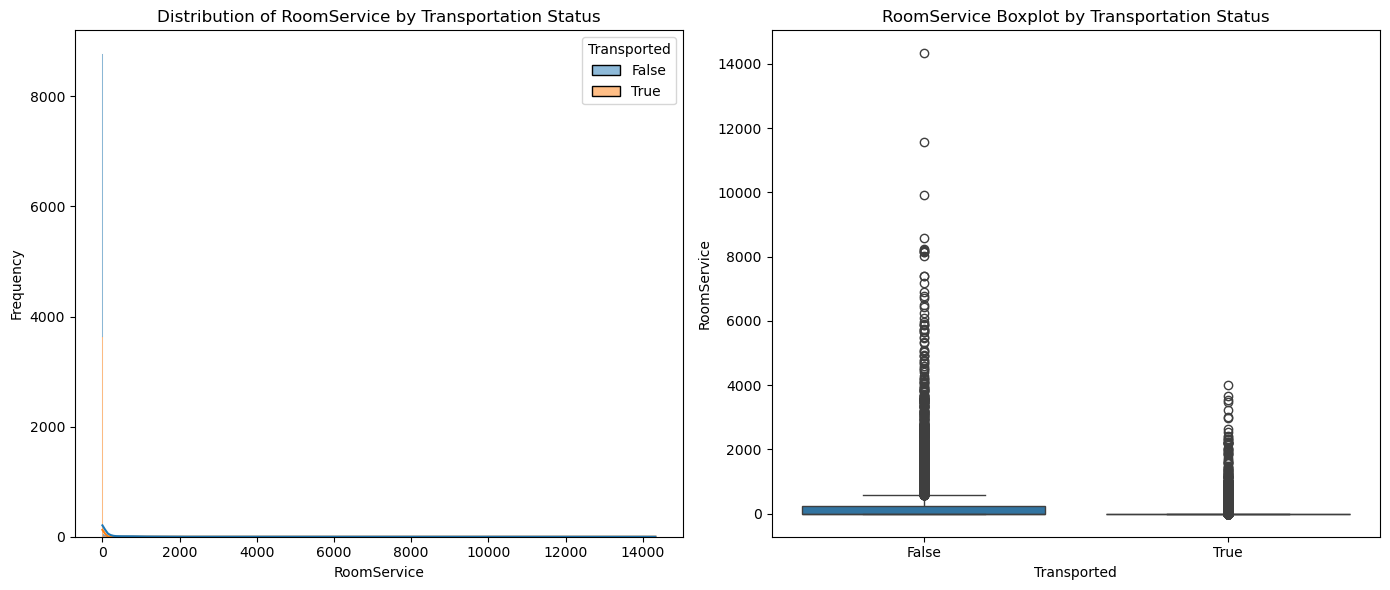

C:\Users\Durjay\AppData\Local\Temp\ipykernel_31284\1217502018.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Durjay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


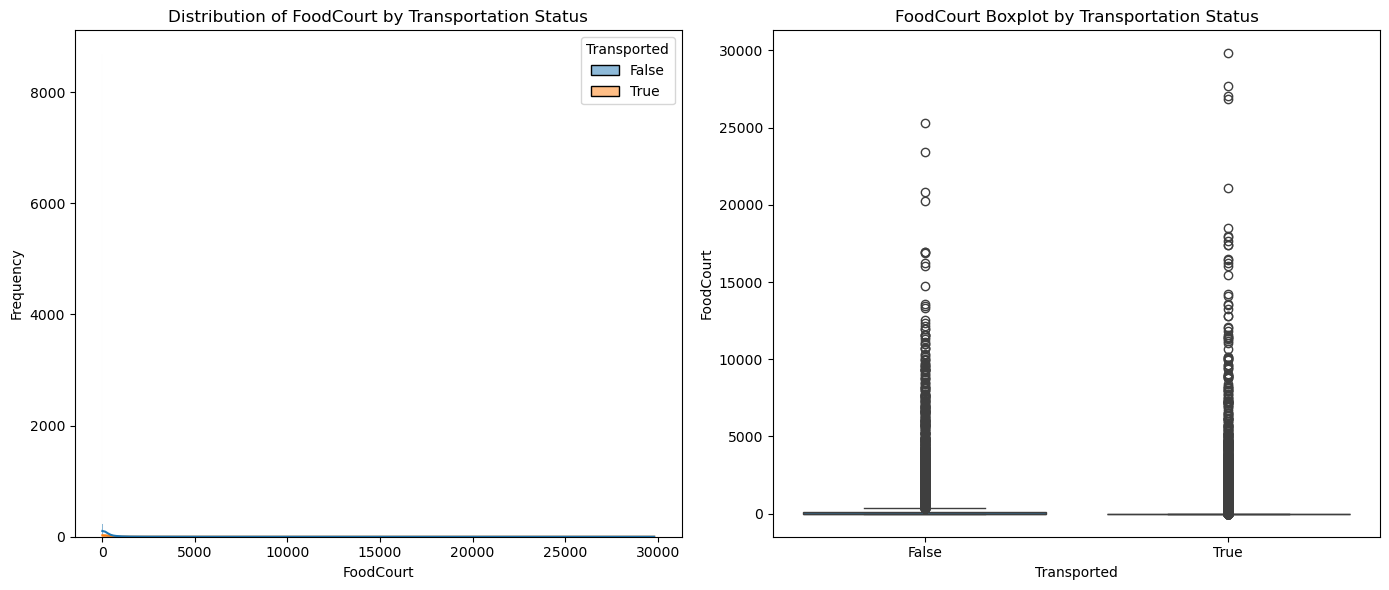

C:\Users\Durjay\AppData\Local\Temp\ipykernel_31284\1217502018.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Durjay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


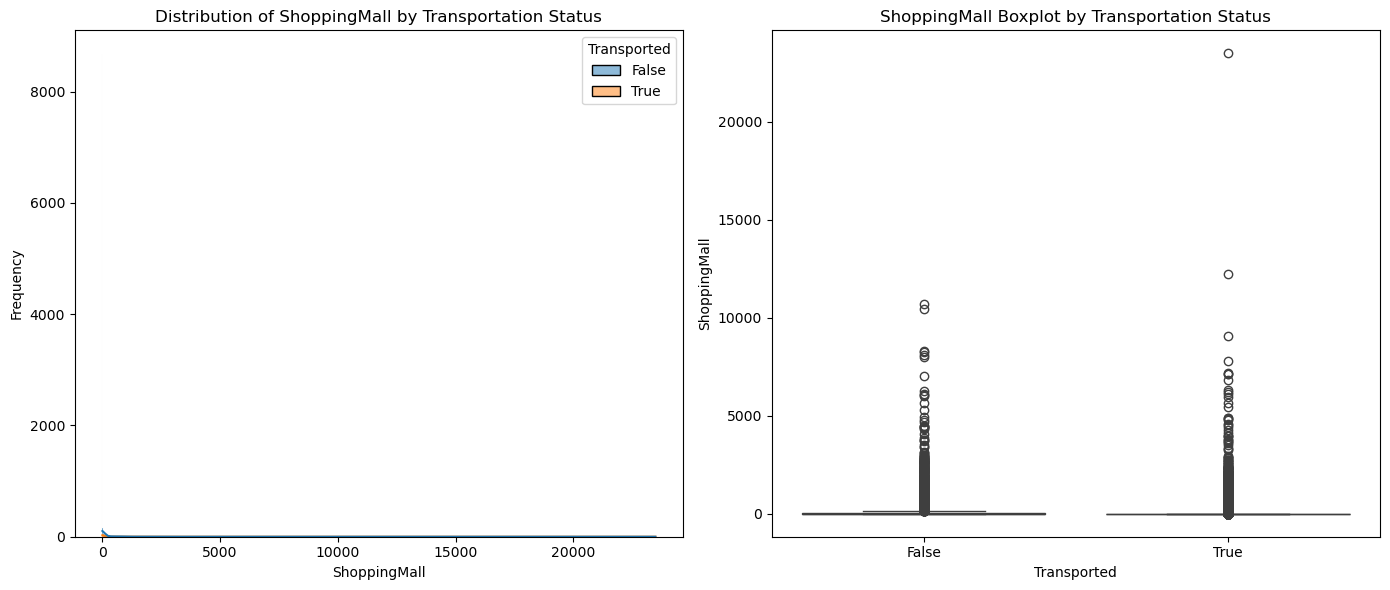

c:\Users\Durjay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


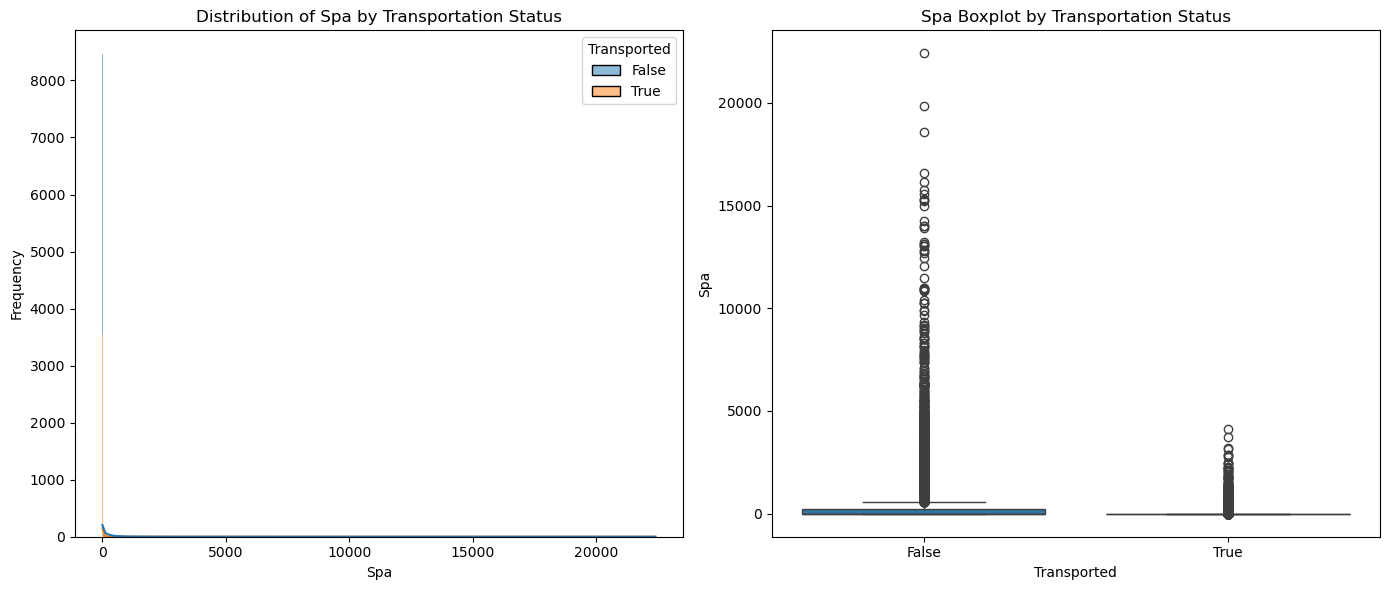

C:\Users\Durjay\AppData\Local\Temp\ipykernel_31284\1217502018.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\Durjay\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


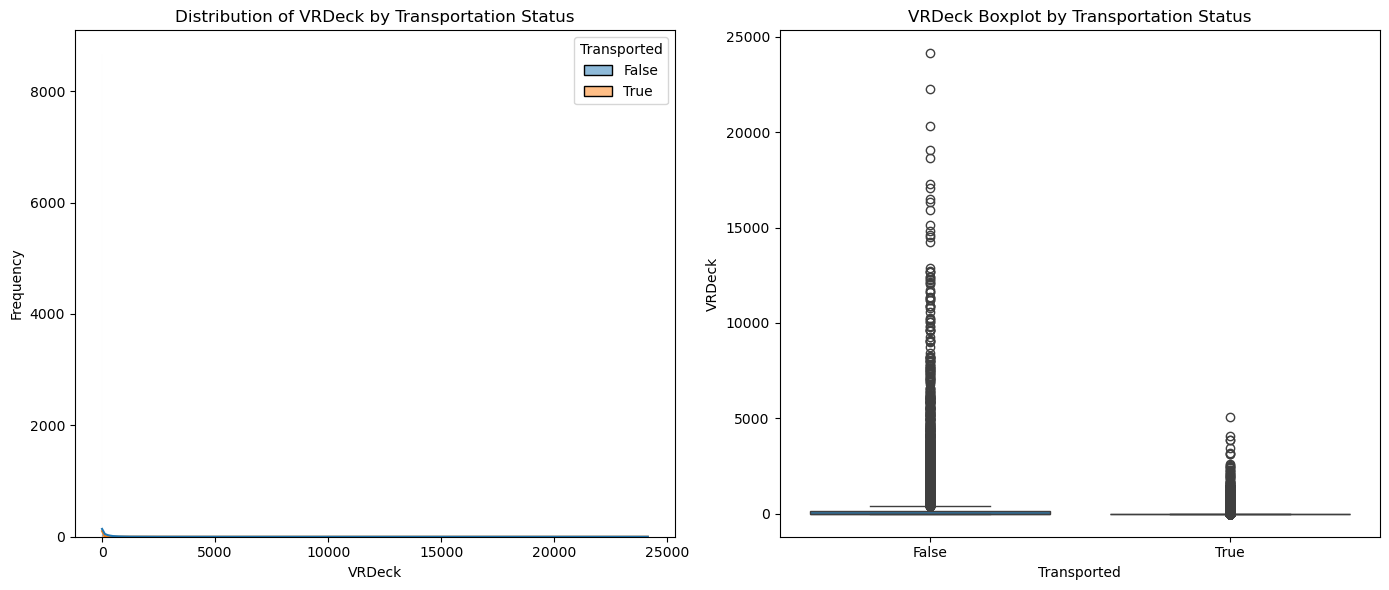

In [18]:
for feature in numerical_features:
    plot_continuous_feature(feature=feature)

## Check for missing values and skewness in numerical features
- Displayed the count of missing values for each column in the dataset.
- Calculated and printed the skewness for each numerical feature.

In [19]:
train_test_data.isnull().sum()

PassengerId       0
HomePlanet      288
CryoSleep       310
Cabin           299
Destination     274
Age             270
VIP             296
RoomService     263
FoodCourt       289
ShoppingMall    306
Spa             284
VRDeck          268
Name            294
Transported       0
dtype: int64

In [20]:
for feature in numerical_features:
    skew = train_test_data[feature].skew()
    print(f"Skewness of {feature}: {skew:.2f}")

Skewness of Age: 0.44
Skewness of RoomService: 6.14
Skewness of FoodCourt: 7.05
Skewness of ShoppingMall: 11.01
Skewness of Spa: 7.65
Skewness of VRDeck: 8.06
